In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('weather-data.csv')
df = df[['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'WindAvgMPH', 'PrecipitationSumInches']]

In [4]:
df.head()

,Date,TempHighF,TempAvgF,TempLowF,HumidityAvgPercent,SeaLevelPressureAvgInches,WindAvgMPH,PrecipitationSumInches
0,2013-12-21,74,60,45,75,29.68,4,0.46
1,2013-12-22,56,48,39,68,30.13,6,0
2,2013-12-23,58,45,32,52,30.49,3,0
3,2013-12-24,61,46,31,56,30.45,4,0
4,2013-12-25,58,50,41,71,30.33,2,T


In [21]:
df.Date.str.split('-', expand = True)
# Split Date
df1 = pd.concat([df, df.Date.str.split('-', expand = True)], axis=1)
df1.drop(columns=['Date'], inplace=True)
df1.rename(columns={0:'year', 1:'month', 2:'day'}, inplace=True)
df1.drop(columns=['year'], inplace=True)
df1.head()

,TempHighF,TempAvgF,TempLowF,HumidityAvgPercent,SeaLevelPressureAvgInches,WindAvgMPH,PrecipitationSumInches,month,day
0,74,60,45,75,29.68,4,0.46,12,21
1,56,48,39,68,30.13,6,0,12,22
2,58,45,32,52,30.49,3,0,12,23
3,61,46,31,56,30.45,4,0,12,24
4,58,50,41,71,30.33,2,T,12,25


In [22]:
df1['TempHighC'], df1['TempAvgC'], df1['TempLowC'] = (df1['TempHighF']-32)*5/9, (df1['TempAvgF']-32)*5/9, (df1['TempLowF']-32)*5/9
df1.head()

,TempHighF,TempAvgF,TempLowF,HumidityAvgPercent,SeaLevelPressureAvgInches,WindAvgMPH,PrecipitationSumInches,month,day,TempHighC,TempAvgC,TempLowC
0,74,60,45,75,29.68,4,0.46,12,21,23.333333,15.555556,7.222222
1,56,48,39,68,30.13,6,0,12,22,13.333333,8.888889,3.888889
2,58,45,32,52,30.49,3,0,12,23,14.444444,7.222222,0.000000
3,61,46,31,56,30.45,4,0,12,24,16.111111,7.777778,-0.555556
4,58,50,41,71,30.33,2,T,12,25,14.444444,10.000000,5.000000


In [23]:
df1.dtypes

TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
HumidityAvgPercent            object
SeaLevelPressureAvgInches     object
WindAvgMPH                    object
PrecipitationSumInches        object
month                         object
day                           object
TempHighC                    float64
TempAvgC                     float64
TempLowC                     float64
dtype: object

In [24]:
df2 = df1.copy()
for c in ['HumidityAvgPercent', 'WindAvgMPH', 'month', 'day']:
    df2[c] = df2[df2[c].apply(lambda x: x.isnumeric())][c].astype(str).astype(int)
df2['PrecipitationSumInches'].replace({'T': None},inplace =True)
df2['PrecipitationSumInches'] = pd.to_numeric(df2["PrecipitationSumInches"], downcast="float")
df2['SeaLevelPressureAvgInches'].replace({'-': None},inplace =True)
df2['SeaLevelPressureAvgInches'] = pd.to_numeric(df2["SeaLevelPressureAvgInches"], downcast="float")
df2.dtypes

TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
HumidityAvgPercent           float64
SeaLevelPressureAvgInches    float32
WindAvgMPH                   float64
PrecipitationSumInches       float32
month                          int32
day                            int32
TempHighC                    float64
TempAvgC                     float64
TempLowC                     float64
dtype: object

In [25]:
print("Valores nulos en el Dataset: \n\n{}\n".format(df2.isnull().sum(axis = 0)[df2.isnull().sum(axis = 0)>0]))

Valores nulos en el Dataset: 

HumidityAvgPercent             2
SeaLevelPressureAvgInches      3
WindAvgMPH                     2
PrecipitationSumInches       124
dtype: int64



In [26]:
df2.dropna(inplace=True)
print("Valores nulos en el Dataset: \n\n{}\n".format(df2.isnull().sum(axis = 0)[df2.isnull().sum(axis = 0)>0]))


Valores nulos en el Dataset: 

Series([], dtype: int64)



In [28]:
df2['SeaLevelPressureAvgMmHg'] = df2['SeaLevelPressureAvgInches']*25.4
df2.head()

,TempHighF,TempAvgF,TempLowF,HumidityAvgPercent,SeaLevelPressureAvgInches,WindAvgMPH,PrecipitationSumInches,month,day,TempHighC,TempAvgC,TempLowC,SeaLevelPressureAvgMmHg
0,74,60,45,75.0,29.680000,4.0,0.46,12,21,23.333333,15.555556,7.222222,753.872009
1,56,48,39,68.0,30.129999,6.0,0.00,12,22,13.333333,8.888889,3.888889,765.301941
2,58,45,32,52.0,30.490000,3.0,0.00,12,23,14.444444,7.222222,0.000000,774.445984
3,61,46,31,56.0,30.450001,4.0,0.00,12,24,16.111111,7.777778,-0.555556,773.429993
5,57,48,39,63.0,30.400000,3.0,0.00,12,26,13.888889,8.888889,3.888889,772.159973


In [29]:
# example of making predictions for a regression problem
from keras.models import Sequential
from keras.layers import Dense

In [33]:
features = df2.drop(['PrecipitationSumInches'], axis=1)
target = df2[['PrecipitationSumInches']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=133)

In [42]:
# We'll use Keras to create a simple model architecture
model = Sequential()
# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model.add(Dense(16, activation='relu', input_shape=(12,)))
# The new second layer may help the network learn more complex representations
model.add(Dense(16, activation='relu'))
# Final layer is a single neuron, since we want to output a single value
model.add(Dense(1))
# Compile the model using a standard optimizer and loss function for regression
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Show a summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                208       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [43]:
history_2 = model.fit(X_train, y_train, epochs=600, batch_size=16,
validation_data=(X_test, y_test))

 mae: 0.1930 - val_loss: 0.1104 - val_mae: 0.1490
Epoch 451/600
53/53 [==============================] - 0s 2ms/step - loss: 0.1887 - mae: 0.1996 - val_loss: 0.1105 - val_mae: 0.1266
Epoch 452/600
53/53 [==============================] - 0s 2ms/step - loss: 0.1853 - mae: 0.1945 - val_loss: 0.1151 - val_mae: 0.1685
Epoch 453/600
53/53 [==============================] - 0s 2ms/step - loss: 0.1930 - mae: 0.1939 - val_loss: 0.1140 - val_mae: 0.1133
Epoch 454/600
53/53 [==============================] - 0s 2ms/step - loss: 0.1884 - mae: 0.1873 - val_loss: 0.1153 - val_mae: 0.1658
Epoch 455/600
53/53 [==============================] - 0s 2ms/step - loss: 0.1864 - mae: 0.1873 - val_loss: 0.1297 - val_mae: 0.2253
Epoch 456/600
53/53 [==============================] - 0s 2ms/step - loss: 0.1862 - mae: 0.1905 - val_loss: 0.1280 - val_mae: 0.1948
Epoch 457/600
53/53 [==============================] - 0s 2ms/step - loss: 0.1883 - mae: 0.1906 - val_loss: 0.1200 - val_mae: 0.1783
Epoch 458/600
53/53

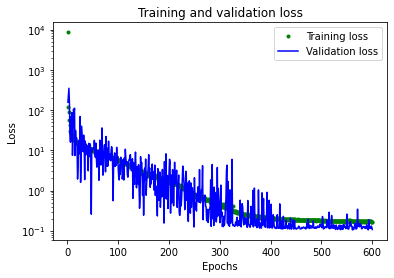

In [50]:
#Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.show()

In [48]:
# We'll use Keras to create a simple model architecture
model2 = Sequential()
# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model2.add(Dense(128, activation='relu', input_shape=(len(X_train.columns),)))
# The new second layer may help the network learn more complex representations
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
# Final layer is a single neuron, since we want to output a single value
model2.add(Dense(1))
# Compile the model using a standard optimizer and loss function for regression
model2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Show a summary of the model
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               1664      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 12,545
Trainable params: 12,545
Non-trainable params: 0
_________________________________________________________________


In [49]:
history2 = model2.fit(X_train, y_train, epochs=600, batch_size=16,
validation_data=(X_test, y_test))

 mae: 0.1876 - val_loss: 0.0947 - val_mae: 0.1532
Epoch 451/600
53/53 [==============================] - 0s 2ms/step - loss: 0.1648 - mae: 0.1753 - val_loss: 0.1099 - val_mae: 0.1308
Epoch 452/600
53/53 [==============================] - 0s 2ms/step - loss: 0.1699 - mae: 0.1786 - val_loss: 0.1105 - val_mae: 0.1530
Epoch 453/600
53/53 [==============================] - 0s 2ms/step - loss: 0.1660 - mae: 0.1779 - val_loss: 0.1205 - val_mae: 0.1920
Epoch 454/600
53/53 [==============================] - 0s 3ms/step - loss: 0.1795 - mae: 0.1808 - val_loss: 0.1040 - val_mae: 0.1658
Epoch 455/600
53/53 [==============================] - 0s 2ms/step - loss: 0.1674 - mae: 0.1758 - val_loss: 0.1214 - val_mae: 0.1943
Epoch 456/600
53/53 [==============================] - 0s 2ms/step - loss: 0.1714 - mae: 0.1858 - val_loss: 0.1140 - val_mae: 0.1566
Epoch 457/600
53/53 [==============================] - 0s 2ms/step - loss: 0.1751 - mae: 0.1824 - val_loss: 0.2298 - val_mae: 0.3705
Epoch 458/600
53/53

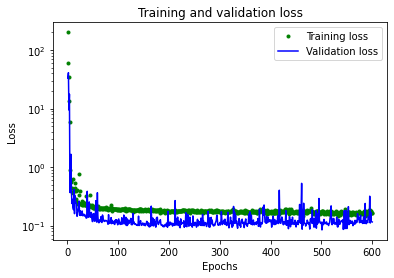

In [51]:
#Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.show()

In [52]:
# We'll use Keras to create a simple model architecture
model3 = Sequential()
# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model3.add(Dense(512, activation='relu', input_shape=(len(X_train.columns),)))
# The new second layer may help the network learn more complex representations
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(16, activation='relu'))
# Final layer is a single neuron, since we want to output a single value
model3.add(Dense(1))
# Compile the model using a standard optimizer and loss function for regression
model3.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Show a summary of the model
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               6656      
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [53]:
history3 = model3.fit(X_train, y_train, epochs=600, batch_size=16,
validation_data=(X_test, y_test))

 mae: 0.1823 - val_loss: 0.1177 - val_mae: 0.1481
Epoch 451/600
53/53 [==============================] - 0s 4ms/step - loss: 0.1883 - mae: 0.2083 - val_loss: 0.1006 - val_mae: 0.1304
Epoch 452/600
53/53 [==============================] - 0s 4ms/step - loss: 0.1715 - mae: 0.1818 - val_loss: 0.1079 - val_mae: 0.2098
Epoch 453/600
53/53 [==============================] - 0s 4ms/step - loss: 0.1687 - mae: 0.1884 - val_loss: 0.1631 - val_mae: 0.2473
Epoch 454/600
53/53 [==============================] - 0s 4ms/step - loss: 0.1704 - mae: 0.1797 - val_loss: 0.1232 - val_mae: 0.1325
Epoch 455/600
53/53 [==============================] - 0s 3ms/step - loss: 0.1876 - mae: 0.1817 - val_loss: 0.1236 - val_mae: 0.1556
Epoch 456/600
53/53 [==============================] - 0s 4ms/step - loss: 0.2144 - mae: 0.2022 - val_loss: 0.1302 - val_mae: 0.1326
Epoch 457/600
53/53 [==============================] - 0s 4ms/step - loss: 0.1864 - mae: 0.1713 - val_loss: 0.1309 - val_mae: 0.1985
Epoch 458/600
53/53

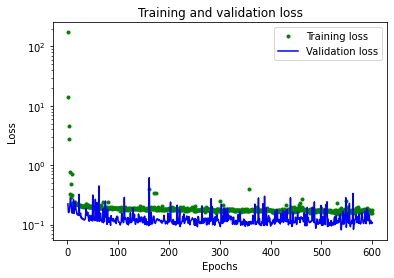

In [54]:
#Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.show()

In [59]:
model3.save('keras_model.h5')

In [60]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model3,'./')